In [1]:
from collections import namedtuple

import matplotlib.pyplot as plt

from answers import entropy_from_probs, entropy_from_classes, cross_entropy_from_probs

# Information Theory

## Key takeaways

- relationship between probability of an event & the information we learn from it
- information 
    * how uncertain an event is 
    * $-log P(x)$
- entropy
    * how much information we learn (on expectation) from a probability distribution
    * $H(x) = - \sum p(x) \log_{2}p(x)$ 
- cross-entropy
- KLD

## Resources & references

- Chapter 3 of [Deep Learning - Benjio, Goodfellow & Courville](https://www.deeplearningbook.org/).
- Chapter 1.6 of [Pattern Recongition and ML - Bishop](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf).
- [Visual Information Theory - colah's blog](https://colah.github.io/posts/2015-09-Visual-Information/)
- [Elements of Information Theory - Cover & Thomas](http://www.cs-114.org/wp-content/uploads/2015/01/Elements_of_Information_Theory_Elements.pdf)
- [A Short Introduction to Entropy, Cross-Entropy and KL-Divergence - Aurélien Géron - YouTube](https://www.youtube.com/watch?v=ErfnhcEV1O8)
- [Shannon Entropy and Information Gain - Luis Serrano - YouTube](https://www.youtube.com/watch?v=9r7FIXEAGvs)

## Why information theory

- ways of measuring and expressing uncertainty
- how different two sets of beliefs are
- how much an answer to one question tells us about others
- how diffuse probability is
- the distance between probability distributions
- how dependent two variables are

## Entropy

> ... von Neumann recommended to Shannon that he use the term entropy, not only because of its similarity to the quantity used in physics, but also because “nobody knows what entropy really is, so in any discussion you will always have an advantage” - Bishop

### Thermodynamic entropy

1st Law = conservation of mass & energy 
- **you can only break even**
- can never create or destroy - only transform

2nd Law = entropy always increases
- **you always lose**
- processes are irreversible
- not all energy is avaiable for useful work
- puts limits on the efficiency of heat engines
- limit based on the temperatures of the heat source and heat sink

$$\eta_{\text{carnot}} = \frac{T_{hot} - T_{cold}}{T_{hot}}$$

## Information entropy

- randomness / unpredictability / uncertainty
- disorder / non-uniformity
- surprise
- information content

### Surprise

Improbable events are more surprising & more informative
- the sun rising is a low information event
- Trump being elected is high information
- Trump being a traitor is low information

Rarer events provide more information

## Quantifying information

We have a qualitative intuition 
- **learning an unlikely event has performed has more information than learning a likely event has happened**

We want a measurement that can quantify information
- guaranteed event = zero
- likely events = low
- less likely = high

Low probability samples have more information
- biased coin is low entropy, unbiased coin is high entropy
- maximized for uniform distributions

## Claude Shannon

1916 - 2001.  American electrical engineer. [Wikipedia](https://de.wikipedia.org/wiki/Claude_Shannon).

![](assets/shannon.jpg)

Shannon founded **Information Theory** in 1948
- introduced the bit
- originally developed in the context of sending communication via radio
- communicating information with 0 or 1 started a revolution in communication

### The channel communication context

Three elements
- data source
- noisy communication channel
- receiver

Receiver understanding the data generated by the source from the signal
- the fundamental problem of communication

Entropy provides a limit on the shortest possible length of a lossless encoding
- encoding of data into signal
- this is analogous with the thermodynamic limit on conversion of heat to power

### Use of the logarithm

Shannon's 1948 paper [A Mathematical Theory of Communication](http://math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf) starts out with a discussion of the logarithm

The logarithm transforms **exponential into linear relationships**

Practical & intuitive

> Parameters of engineering importance such as time, bandwidth, number
of relays, etc., tend to vary linearly with the logarithm of the number of possibilities. For example, adding one relay to a group doubles the number of possible states of the relays.

Mathematically suitable

> Many of the limiting operations are simple in terms of the logarithm but would require clumsy restatement in terms of the number of possibilities.

Choice of the logarithm base = determines the unit of information
- $\log_{e}$ = nats
- $\log_{2}$ = **bits**

### Bits

Discrete random variable

Bit = 0 or 1
- but not all bits are useful
- one bit reduces uncertainty by 2 (encoding independent)

### Information content

Information content of an event $h(x)$ is given by

$$h(x) = - \log_{2}p(x)$$

- base 2 means information is measured in **bits** [0, 1]

### Entropy

[Entropy - Wikipedia](https://en.wikipedia.org/wiki/Entropy_(information_theory))

Entropy $H(x)$ is the average information content of a distribution
- how much information you get when sampling from a probability distribution
- an expectation
- probability of occuring * information content

$$H(x) = - \sum p(x) \log_{2}p(x)$$

$$H(x) = - \mathbf{E}_{x \sim P}[\log_{2} P(x)]$$

Entropy can also be written

$$ H(x) =  \mathbf{E}_{x \sim P} \cdot \log_{2} \frac{1}{P(x)} $$

Using the identity $\log(1/a) = -\log(a)$

Entropy only accounts for information about the probability distribution - not the meaning of the events themselves

## Practical - implement entropy from probabilities

Let's imagine a probability distribution with three discrete states:

In [2]:
import numpy as np
State = namedtuple('State', ['name', 'prob'])

s_bahn = [
    State('15 minutes', 0.3), 
    State('30 minutes', 0.2),
    State('60 minutes', 0.5)
]

Write a function to calculate the entropy of the distribution using pure Python:

In [3]:
[state.prob for state in s_bahn]

[0.3, 0.2, 0.5]

In [4]:
expect = []
for prob in [state.prob for state in s_bahn]:
    expect.append(-prob * np.log2(prob))
    
sum(expect)

1.4854752972273344

In [5]:
# check with
entropy_from_probs([state.prob for state in s_bahn], base=2)

1.4854752972273346

We can compare this with another, more predictable journey home:

In [6]:
u_bahn = [
    State('15 minutes', 0.5), 
    State('25 minutes', 0.5)
]

In [7]:
entropy_from_probs([state.prob for state in u_bahn])

0.6931471805599453

**The more predictable journey has lower entropy**

## Practical - implement entropy from categories

Implement the calculation of entropy from a single column of states
- you will need to create a probability distribution

In [8]:
states = np.random.choice(('A', 'B', 'C'), size=10000)

states[:10]

array(['B', 'A', 'A', 'B', 'C', 'A', 'B', 'C', 'C', 'A'], dtype='<U1')

In [9]:
#  the answer
 entropy_from_classes(states)

1.0984077904013774

## A visual guide to information theory

The images & content below are taken from the excellent [colah's blog](https://colah.github.io) - specifically the post **[Visual Information Theory](https://colah.github.io/posts/2015-09-Visual-Information/)**

### Distributions

Imagine you have two probability distributions 
- one over the weather
- one over what clothes you wear

<img src="assets/info1.png" alt="" width="200"/>

If our distributions are **independent**, we can visualize them as follows

<img src="assets/info2.png" alt="" width="300"/>

This independence means that we can calculate the probability of two events occurring through simple multiplication - there is no interaction

We can calculate the **joint** probability of two events by multiplying them together:

In [10]:
weather = {'rain': 0.25, 'sun': 0.75}
clothes = {'coat': 0.38, 'shirt': 0.62}

weather['sun'] * clothes['shirt']

0.46499999999999997

When our events do interact, we need to reassign the probability mass and speak in terms of **conditional** probabilities
- these conditional probabilities are extra information

We can now see that our lines do not intersect both distributions at the same place  - they cut at different points
- incorporating these conditional probabilities requires more information
- $P(coat | rain) = 0.75$
- this reassigns the probability mass

<img src="assets/info3.png" alt="" width="350"/>

These conditional probabilities can be factored out

$$P(rain, coat) = P(rain) \cdot P(coat | rain)$$

To calculate the probability that it is raining and we are wearing a coat:

In [11]:
0.25 * 0.75

0.1875

Note that we can also do the opposite
- this feels wierd because it goes in the opposite direction of causality
- but it still works

We need some additional information 
- $P(rain|coat) = 0.5$ 

<img src="assets/info4.png" alt="" width="300"/>

$$P(coat, rain) = P(coat) \cdot P(rain | coat)$$

The probabilities over clothes are now **marginal** 
- the probability of wearing clothes without considering the weather

In [12]:
0.38 * 0.5

0.19

### Encoding

Imagine the problem of communication using bits with a vocabulary of four words

<img src="assets/info5.png" alt="" width="500"/>

The problem is that communication is expensive 
- the cost varies with the number of bits

The opportunity is that some words are more common than others
- we can create an encoding that takes advantage of this

<img src="assets/info6.png" alt="" width="400"/>

We can visualize our old and new encodings

<img src="assets/info7.png" alt="" width="700"/>

This average message length is the entropy

$$ H(x) = - \mathbf{E}_{x \sim P}[\log P(x)] $$


In [13]:
entropy_from_probs([1/2, 1/4, 1/8, 1/8], base=2)

1.75

### Cross-Entropy

[Cross-Entropy - Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

We now have two different distributions over words

<img src="assets/info8.png" alt="" width="400"/>

We can calculate the average length of a communication when 
- using the code optimized for one distribution 
- to communicate events for a second

This is the **cross-entropy**

$$ H(P,Q) = - \mathbf{E}_{x \sim P}\log Q(x)$$

$$ H_{p}(q) = - \sum\limits_{x} q(x) \cdot \log_{2} p(x) $$


Average number of bits needed to 
- identify a sample 
- with a coding scheme optimized for an estimated distribution $q$ 
- rather than the true distribution $p$

Minimizing the KLD is the same as minimizing the cross entropy

Cross_entropy = entropy + KLD

$$H(P,Q) = H(P) + D_{KL}(P||Q)$$

If true = predicted -> cross entropy = entropy

## Practical - cross entropy

Write a function to calculate the cross-entropy between the two distributions above 
- both $H_{p}(q)$ and $H_{q}(p)$

In [14]:
# answers

cross_entropy_from_probs(
    [1/2, 1/4, 1/8, 1/8], [1/8, 1/2, 1/4, 1/8]
)

2.374999999999999

In [15]:
cross_entropy_from_probs(
    [1/8, 1/2, 1/4, 1/8], [1/2, 1/4, 1/8, 1/8]
)

2.249999999999999

The cross entropy tells us 
- how much longer our messages will be if we use an inappropriate code
- how different our distributions are

## Kullback–Leibler divergence (KLD)

Cross entropy gives us a difference in average information content for two encodings
- this difference is known as the **Kullback–Leibler divergence**

$$D_{KL}(P||Q) = \mathbf{E}_{x \sim P}[\log P(x) - \log Q(x)] $$

The extra amount of information needed to send a message containing symbols from $P$ when using a code designed to minimize the length of messages for $Q$

## Practical

Implement a function to calculate the KLD between our two distributions

In [16]:
def kld(q, p):
    out = []
    for Q, P in zip(q, p):
        out.append(P * (np.log2(P) - np.log2(Q)))
    return sum(out)
        
p, q = [1/8, 1/2, 1/4, 1/8], [1/2, 1/4, 1/8, 1/8]
kld(p, q)

0.625

In [17]:
cross_entropy_from_probs(q, p) - entropy_from_probs(p, base=2)

0.6249999999999991

From the exercise above you can see that 

$$H_{p}(q) \neq H_{q}(p)$$

This means that **cross-entropy / KLD is not symmetric**.  Why is this important?
- many people refer to the KLD as a distance
- this is technically not correct

Cross entropy & KLD are very useful in machine learning
- cross entropy loss - minimize the difference between a prediction & true sample
- reinforcement policy gradient methods use a constraint or penalty on KLD to stop catastrophic policy updates

Suppose we have two distributions $P(x)$ and $Q(x)$
- example = a parameterized neural net & the function we are trying to learn

We can measure the difference between the two using the **Kullback-Leiber divergence (KLD)** (it is not a true distance measure - not symmetric)

## Minimizing cross entropy

A common operation in modern ML is minimizing cross entropy between a one hot encoded label & a softmax.

The **softmax** is a less aggressive form of one hot encoding

In [18]:
def softmax(X):
    exps = np.exp(X)
    return exps / np.sum(exps)

def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [19]:
feature_map = np.random.normal(size=5)
feature_map

array([ 1.05593051, -0.14746982, -0.18588279,  0.97584119, -0.22097437])

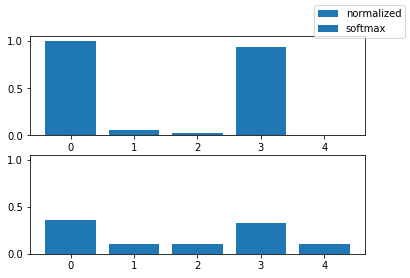

In [20]:
f, a = plt.subplots(nrows=2, sharey=True)
a[0].bar(np.arange(len(feature_map)), normalize(feature_map), label='normalized')
a[1].bar(np.arange(len(feature_map)), softmax(feature_map), label='softmax')
_ = f.legend()

In [21]:
label = np.zeros(feature_map.shape[0])
label[1] = 1

label

array([0., 1., 0., 0., 0.])

In [22]:
cross_entropy_from_probs(softmax(feature_map), label)

47.43440854369629

In [23]:
softmax(feature_map)

array([0.35829903, 0.10755126, 0.10349824, 0.33072215, 0.09992931])